作业一：复现课堂代码

情境设定：写诗

第一部分：Pattern 泛化

In [19]:
#设定规则
poem_rule='''
row => noun_phrase verb_phrase1 | verb_phrase2 verb noun_phrase
noun_phrase => adj* noun | number* noun
adj* => adj | adj | adj
number* => number | number | number
verb_phrase1 => verb noun_phrase
verb_phrase2 => verb noun
number => 一 | 二 | 三 | 四 | 五 | 六 | 七 | 八 | 九 | 十 | 百 | 千 | 万
noun => 江 | 花 | 日 | 山 | 水 | 叶 | 丘 | 鸟 | 月 | 蝉 | 泉 | 海 | 秋
adj =>  红 | 白 | 黄 | 蓝 | 远 | 近 | 遥 | 香 | 衰 | 深 | 浅 | 暖 | 寒
verb => 来 | 去 | 过 | 走 | 没 | 衰 | 归 | 尽 | 流 | 回 | 争 | 知 | 踏
'''

In [20]:
#随机选择
import random

#整理用于随机读取的数据库 ---- 使用字典进行存储
def get_generation_poem (raw_string, target, stmt_split = '=>', or_split = '|'):
    rules = dict() #对象为字典
    for line in raw_string.split('\n'): #与预处理的数据特点有关
        if not line: continue
        stmt, expression = line.split(stmt_split) #分开
        rules[stmt.strip()]=expression.split(or_split) # 分开的同时去掉首尾的空格，确保映射
        generated = generate (rules, target = target) # 嵌套，见下
    return generated

def generate(rule, target):
    if target in rule: 
        words = rule[target] #在字典中，取得对应的语法数据集
        word = random.choice(words) #随机选择一套语法
        return ''.join(generate(rule, target=c.strip()) for c in word.split()) #去掉首尾空格
    else:
        return target #如果映射不对，则会回到原先的语法规则

In [22]:
for i in range(4):
    print (get_generation_poem(poem_rule,target='row'))

四蝉知暖叶
尽泉回三蝉
黄花尽九叶
白叶知远泉


第二部分：2-gram 概率计算

In [23]:
corpus='C:/Users/GuoBaiPing/Desktop/个人文件/人工智能与NLP 5期/article_9k.txt' #注意/
FILE=open(corpus,encoding='UTF-8').read() # 注意encoding = 'UTF-8'

In [24]:
import jieba #使用jieba切词

max_length=3000000
sub_file=FILE[:max_length]
def cut(string):
    return list(jieba.cut(string)) #注意将jieba切词的结果转成list列表

TOKENS = cut(sub_file) 
# most of what we are going to do with language relies on 
# separating out or tokenizing words from running text, the task of tokenization

In [34]:
import collections
from collections import Counter #计数
import matplotlib.pyplot as plt #绘图
%matplotlib inline
import numpy as np

words_count=Counter(TOKENS)
words_with_fre=[f for w, f in words_count.most_common(100000)] #count.most_common()按需求设值。此处返回一个列表，列表是按频率多少从大到小的排列
#print(words_with_fre)

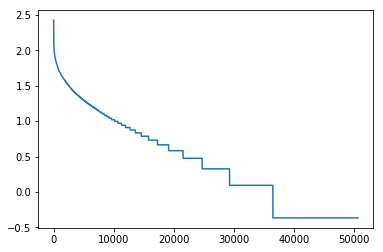

In [37]:
plt.plot(np.log(np.log(words_with_fre))) #这里使用的是散点图，并用log将其特点更突出

In [45]:
_2_gram_words = [
    TOKENS [i] + TOKENS [i+1] for i in range(len(TOKENS)-1)
]
#建立2-gram的新列表
#print(_2_gram_words[:100])

_2_gram_word_counts = Counter(_2_gram_words)

In [52]:
def get_1_gram_count(word):
    if word in words_count : 
        return words_count[word]
    else:
        return words_count.most_common()[-1][-1] #确保如果找不到该词，必定返回最小的计数，即1，这样在进行除法运算时不会出现分子为0的情况

#print(get_1_gram_count('abc'))

def get_2_gram_count(word):
    if word in _2_gram_words : 
        return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1] #确保如果找不到该词，必定返回最小的计数，即1，这样在进行除法运算时不会出现分子为0的情况
    
#def get_gram_count(word,wc):
#    if word in wc: return wc[word]
#    else:
#        return wc.most_common()[-1][-1]
#以上代码也可以替代 def get_1_gram_count(word)和 def get_2_gram_count(word)
    
def _2_gram_models(sentence):
    tokens=cut(sentence) #将input的语句进行切分
    probability=1 #因为是个似然函数，所以初始化为1
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word=tokens[i+1]
        pro=get_2_gram_count(word+next_word) / get_1_gram_count(word)
        probability *= pro #似然计算
    return probability

In [53]:
_2_gram_models('你今天喝咖啡了吗')

8.974783952864984e-09